<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Часть-1:-Много-гипотез" data-toc-modified-id="Часть-1:-Много-гипотез-1">Часть 1: Много гипотез</a></span><ul class="toc-item"><li><span><a href="#Мудрость" data-toc-modified-id="Мудрость-1.1">Мудрость</a></span></li><li><span><a href="#Алексей" data-toc-modified-id="Алексей-1.2">Алексей</a></span></li><li><span><a href="#Рейтинги-президентов" data-toc-modified-id="Рейтинги-президентов-1.3">Рейтинги президентов</a></span></li><li><span><a href="#Сон" data-toc-modified-id="Сон-1.4">Сон</a></span></li><li><span><a href="#Say-my-name" data-toc-modified-id="Say-my-name-1.5">Say my name</a></span></li><li><span><a href="#Матан" data-toc-modified-id="Матан-1.6">Матан</a></span></li><li><span><a href="#Бутерброд" data-toc-modified-id="Бутерброд-1.7">Бутерброд</a></span></li></ul></li><li><span><a href="#Часть-2:-Продолжаем-проверять-гипотезы" data-toc-modified-id="Часть-2:-Продолжаем-проверять-гипотезы-2">Часть 2: Продолжаем проверять гипотезы</a></span><ul class="toc-item"><li><span><a href="#Однородная-игра" data-toc-modified-id="Однородная-игра-2.1">Однородная игра</a></span></li><li><span><a href="#Мыши-и-зеркало" data-toc-modified-id="Мыши-и-зеркало-2.2">Мыши и зеркало</a></span></li><li><span><a href="#Энергетик" data-toc-modified-id="Энергетик-2.3">Энергетик</a></span></li><li><span><a href="#Бомбардировки" data-toc-modified-id="Бомбардировки-2.4">Бомбардировки</a></span></li></ul></li><li><span><a href="#Еще-больше-гипотез" data-toc-modified-id="Еще-больше-гипотез-3">Еще больше гипотез</a></span><ul class="toc-item"><li><span><a href="#Сиэтл" data-toc-modified-id="Сиэтл-3.3">Сиэтл</a></span></li><li><span><a href="#Расход-топлива" data-toc-modified-id="Расход-топлива-3.4">Расход топлива</a></span><ul class="toc-item"><li><span><a href="#vs,-mpg" data-toc-modified-id="vs,-mpg-3.4.1">vs, mpg</a></span></li><li><span><a href="#am,-mpg" data-toc-modified-id="am,-mpg-3.4.2">am, mpg</a></span></li><li><span><a href="#vs,-am" data-toc-modified-id="vs,-am-3.4.3">vs, am</a></span></li></ul></li></ul></li></ul></div>

# Часть 1: Много гипотез

В этом домашнем задании нужно проверить много-много гипотез

Каждая дает по 5 баллов

**Часть 1**

| Задание              | Баллы |
|----------------------|-------|
| Мудрость             |     5 |
| Алексей              |     5 |
| Рейтинги президентов |     5 |
| Сон                  |     5 |
| Say my name          |     5 |
| Матан                |     5 |
| Бутерброд            |     5 |
| Всего            |     35 |


**Часть 2**

| Задание            | Датасет         | Баллы |
|--------------------|-----------------|-------|
| Однородная игра    | killer_time     |     7 |
| Мыши и зеркало     | mouses_mirror   |     7 |
| Энергетик          | energy drink    |     7 |
| Бомбардировки      | london          |     7 |
| Сиэтл              | seattle         |     7 |
| Расход топлива - 1 | mtcars: vs mpg  |     5 |
| Расход топлива - 2 | mtcars: am mpg  |     5 |
| Расход топлива - 3 | mtcars: am vs   |     5 |
|                    | Всего           |    50 |


In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
ROOT=''

## Мудрость

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её можно лайкнуть. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она будет лайкнута, повышается. Например, цитату

> Можно простить человеку все, кроме отсутствия. (Экзюпери)

мне не очень хотелось бы лайкать. А вот цитата

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков)

совершенно другое дело.

В табличке `df_vk_wise` лежат данные о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено, и будем работать с остатками.

In [2]:
df = pd.read_csv(ROOT+'df_vk_wise.csv')[50:]
df.head()

,likes,reposts,text,I
50,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
51,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
52,914,37,Если испытываешь по-настоящему глубокое чувств...,False
53,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
54,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


Постройте гистограмму для числа лайков постов, содержащих личные местоимения и не содержащих.

In [3]:
df.I.value_counts()

I
False    6527
True     2548
Name: count, dtype: int64

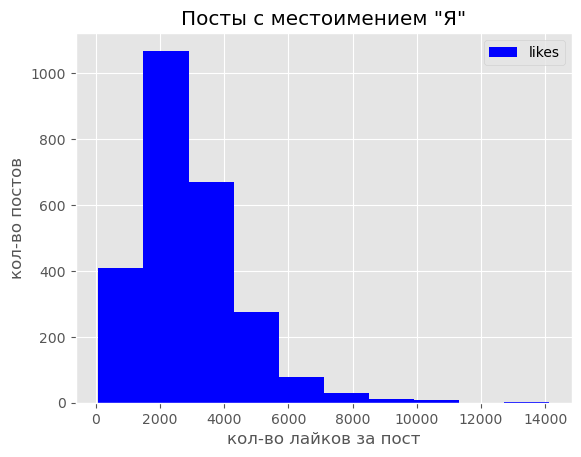

In [4]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
ax = df[df.I].likes.hist(legend=True, color='blue')
ax.set_xlabel('кол-во лайков за пост')
ax.set_ylabel('кол-во постов')
_ = ax.set_title('Посты с местоимением "Я"')

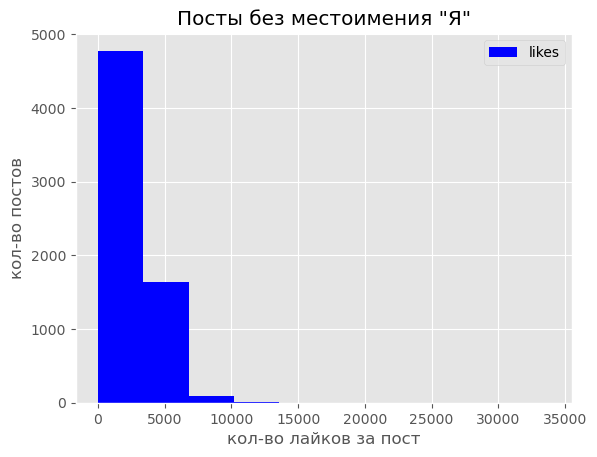

In [5]:
ax = df[~df.I].likes.hist(legend=True, color='blue')
ax.set_xlabel('кол-во лайков за пост')
ax.set_ylabel('кол-во постов')
_ = ax.set_title('Посты без местоимения "Я"')

Хвосты на гистограммах оказываются очень длинными. Найдите медианы и средние для числа лайков. Сравните их между собой.

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
print(f'Посты с местоимением "я": среднее - {df[df.I].likes.mean():.1f}; медиана - {df[df.I].likes.median()}')
print(f'Посты без местоимения "я": среднее - {df[~df.I].likes.mean():.1f}; медиана - {df[~df.I].likes.median()}')

Посты с местоимением "я": среднее - 2879.2; медиана - 2588.5
Посты без местоимения "я": среднее - 2784.0; медиана - 2497.0


<font color=blue>

Видно, что среднее число лайков (и медиана) за пост с местоимением "Я" немного больше, чем за пост без этого местоимения.    
</font>

Проверьте гипотезу о равенстве среднего числа лайков. Используйте для этого $z$-тест, основанный на ЦПТ. Дисперсию расчитывайте по выборке, используя несмещённую оценку `(ddof=1)`. Запишите наблюдаемое значение статистики в переменную `z_obs`.

<font color=blue>
    
Если $\mu_1$ - это ожидаемое число лайков за пост, где есть личное местоимение, а $\mu_2$ - где нет такого местоимения, то будем проверять гипотезу $H_0: \mu_1 = \mu_2$ о равенстве средних против правосторонней альтернативы $H_a: \mu_1 > \mu_2$. Т.к. альтернатива правосторонняя, то $z_{crit} = z_{1-\alpha}$, где $\alpha$ - уровень значимости и $\text{p-value} = 1 - \mathbb{P}\{N(0,1) \leq z_{obs} | H_0\}$.
    
</font>

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
alpha = 0.05
d1, d2 = df[df.I].likes, df[~df.I].likes
n1, n2 = d1.size, d2.size
diff_hat = d1.mean() - d2.mean()
diff_std = np.sqrt(d1.var(ddof=1)/n1+d2.var(ddof=1)/n2)
z_obs = diff_hat/diff_std

print(f'z_obs: {z_obs:.4f}')

z_obs: 2.6645


Найдите критическое значение статистики. Сравните его с наблюдаемым. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Критическое значение статистики запишите в переменную `z_crit`, а p-значение в переменную `pval`.

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
z_crit = stats.norm().ppf(1 - alpha)
pval = (1 - stats.norm().cdf(np.abs(z_obs)))

print(f'z_crit: {z_crit:.4f}; p-value: {pval:.4f}')

z_crit: 1.6449; p-value: 0.0039


<font color=blue>

Наблюдаемая статистика $z_{obs} > z_{crit}$, т.е. на уровне значимости $\alpha=0.05$ гипотезу $H_0$ о равенстве средних можно отвергнуть. Гипотезу $H_0$ можно принимать только при уровнях значимости $\alpha < \text{p-value} \approx 0.004$. Т.к. $\text{p-value}$ весьма мал, то гипотеза $H_0$ отвергается на любом разумном уровне значимости. 

</font>

In [9]:
# проверка того, что задание решено верно
assert np.abs(z_obs - 2.6644610922505323) < 1e-5

Можно заметить, что у распределения числа репостов длинные хвосты. В данных есть выбросы, которые завышают среднее значение. Если выбросы сильные, то ЦПТ может ломаться. Из-за этого имеет смысл в данном случае проверять гипотезу о равенстве медиан, которые устойчивы к выбросам.

-------------------

## Алексей

__Люди всё время меня спрашивают, знаю ли я Алексея?__ Да, знаю. Он делает лучшее мыло в стране.

__а)__ Алексей считает партию изделий хорошей, если дисперсия размера не превышает $25$ грамм$^2$. Пока Алексей летел в самолёте, он измерил $10$ кусков мыла. Выборочная дисперсия оказалась равна $27$ грамм$^2$. Можно ли продавать эту партию или её надо списать в брак?

В предположении гауссовской выборки (или ЦПТ), выборочная дисперсия имеет распределение хи-квадрат с $n-1$ степенью свободы, так как это сумма квадратов (примерно) гауссовских независимых величин.

При проверке этой гипотезы найдите $p$-значение и запишите его в переменную `pval1`. Наблюдаемое значение статистики запишите в переменную `chi_obs`. Используйте уровень значимости $1\%$.

<font color=blue>

Проверяем гипотезу $H_0: \sigma^2 \leq \sigma_0^2 = 25$, против правосторонней альтернативы $H_a: \sigma^2 > \sigma_0^2 = 25$. Т.к. альтернатива правосторонняя, то $\chi^2_{crit}(n-1) = \chi^2_{1-\alpha}(n-1)$ и $\text{p-value} = 1 - \mathbb{P}\{\chi^2_9\leq \chi^2_{obs} | H_0\}$.

</font>

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
alpha = 0.01
n = 10
chi_obs = (n-1) * 27/25
chi_crit = stats.chi2(n-1).ppf(1 - alpha)
pval1 = (1 - stats.chi2(n-1).cdf(chi_obs))

print('chi_obs: ', chi_obs)
print('chi_crit: ', chi_crit)
print('p-value: ', pval1)

chi_obs:  9.72
chi_crit:  21.665994333461924
p-value:  0.37362476510008014


<font color=blue>
    
Наблюдаемая статистика $\chi^2_{obs} < \chi^2_{crit}$, поэтому гипотеза $H_0$ о непревышении дисперсии величины $25$ грамм^2 принимается. Т.к. $\text{p-value} > 0.3$ (весьма велико), то нулевая гипотеза принимается на любом разумном уровне значимости $\alpha$.  
</font>

__б)__ Для того, чтобы уменьшить количество бракованного мыла, Алексей собирается внедрить новую технологию производства. Алексей произвёл по старой технологии $100$ кусков мыла. Стандартное отклонение этой партии составило $6$ грамм. Для  новой технологии стандартное отклонение, посчитанное по $100$ кускам мыла, составило $5$ грамм. Правда ли, что новая технология обладает меньшей дисперсией и её нужно внедрить на производстве?

При проверке этой гипотезы найдите $p$-значение и запишите его в переменную `pval2`. Используйте уровень значимости $1\%$.

<font color=blue>
Проверяем гипотезу $H_0: \sigma_1^2 = \sigma_2^2$, против правосторонней альтернативы $H_a:\sigma_1^2 > \sigma_2^2$

Альтернатива правосторонняя, поэтому $F_{crit} = F_{1-\alpha}(n-1, n-1)$ и $\text{p-value} = 1 - \mathbb{P}\{F_{n-1,n-1} \leq F_{obs} | H_0\}$

</font>

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
alpha = 0.01
n = 100
F_obs = (6/5) ** 2
F_crit = stats.f(n - 1, n - 1).ppf(1 - alpha)
pval2 = 1-stats.f(n - 1, n - 1).cdf(F_obs)

print(f'F_obs: {F_obs}; F_crit: {F_crit:.4f};  p-value: {pval2:.4f}')

F_obs: 1.44; F_crit: 1.6015;  p-value: 0.0356


<font color=blue>
    
Наблюдаемая статистика $F_{obs} < F_{crit}$, поэтому гипотеза о равенстве дисперсий принимается на уровне $\alpha=0.01$. Однако $\text{p-value} \approx 0.035$, т.е. уже при вполне разумном уровне $\alpha=0.05$, гипотезу $H_0$ можно будет отвергнуть и принять решение о внедрении новой технологии.
    
</font>

In [12]:
# проверка того, что задание решено верно
assert np.abs(chi_obs - 9.72) < 1e-1
assert np.abs(F_obs - 1.44) < 1e-1

## Рейтинги президентов

В таблице `presidents.csv` представлены рейтинги различных президентов США. Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

__Люди всё время меня спрашивают, знаю ли я Никсона.__ Да, Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [13]:
df = pd.read_csv(ROOT+'presidents.csv')
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [14]:
df_new = pd.melt(df, id_vars=['year'], value_vars=['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4']).\
sort_values(by=['year', 'variable']).\
reset_index(drop=True)

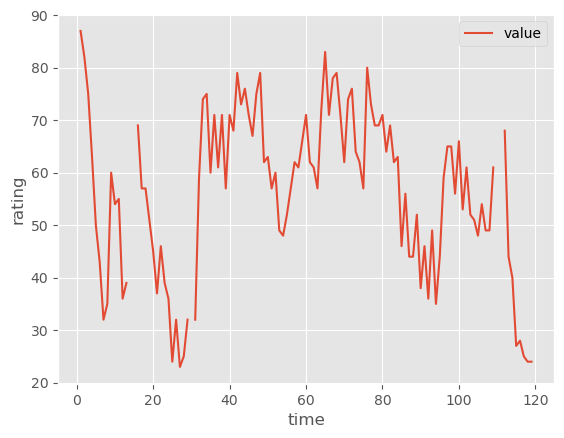

In [15]:
ax = df_new.value.plot()
ax.set_ylabel('rating')
ax.set_xlabel('time')
_ = ax.legend()

In [16]:
start_index_x = df_new[(df_new.year == 1969) & (df_new.variable == 'Qtr1')].index[0]
stop_index_x = df_new[(df_new.year == 1972) & (df_new.variable == 'Qtr2')].index[0] + 1
start_index_y = df_new[(df_new.year == 1972) & (df_new.variable == 'Qtr3')].index[0]
stop_index_y = df_new[(df_new.year == 1974) & (df_new.variable == 'Qtr2')].index[0] + 1

In [17]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

x = df_new[start_index_x:stop_index_x].value.dropna().to_numpy()
y = df_new[start_index_y:stop_index_y].value.dropna().to_numpy()


<font color=blue>
    
Таким образом в `x` у нас  рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года, а в `y` рейтинг с 3 квартала 1972 года по 2 квартал 1974 года.
    
</font>

Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

<font color=blue>
Проверияем гипотезу о равенстве средних рейтингов $H_0: r_x = r_y$, против правосторонней альтернативы (рейтинг снизился после скандала) $H_a: r_x > r_y$. Т.к. альтернатива правосторонняя (рейтинг снизился), то $t_{crit} = t_{1-\alpha}(n_x+n_y-2)$ и $\text{p-value} = 1 - \mathbb{P}\{t_{n_x+n_y-2} \leq t_{obs} | H_0\}$
 
</font>

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
alpha = 0.01
var_x = x.var(ddof=1)
var_y = y.var(ddof=1)
nx = len(x)
ny = len(y)
var = ((nx - 1) * var_x + (ny - 1) * var_y)/(nx + ny - 2)
obs = (x.mean() - y.mean())/np.sqrt(var / nx + var / ny)
t_crit = stats.t(df = nx + ny - 2).ppf(1 - alpha)
pval = 1 - stats.t(df = nx + ny - 2).cdf(obs)

print(f't_obs: {obs:.4f}; t_crit: {t_crit:.4f}; p-value: {pval:.5f}')

t_obs: 3.5641; t_crit: 2.5524; p-value: 0.00111


<font color=blue>
Наблюдаемый $\text{p-value} \approx 0.00111$, т.е. гипотеза $H_0$ может быть принята только при весьма низком уровне значимости $\alpha \leq 0.001$. При $\alpha=0.01$ нулевая гипотеза отвергается, т.е. можно достаточно уверенно принять тот факт, что скандал снизил рейтинг Никсона.
</font>

In [19]:
# проверка того, что задание решено верно
assert np.abs(obs - 3.5640741313229793) < 1e-5


## Сон

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [20]:
df = pd.read_csv(ROOT+'sleep.csv')
df.head(10)

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5
5,3.4,1,6
6,3.7,1,7
7,0.8,1,8
8,0.0,1,9
9,2.0,1,10


Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение.

In [21]:
x = df[df.group==1].extra.to_numpy()
y = df[df.group==2].extra.to_numpy()

In [22]:
print(x.mean(), y.mean())

0.75 2.3299999999999996


<font color=blue>
 
Таким образом в массиве `x` результаты до эксперимента, а в `y` после. Проверим сначала гипотезу $H_0: \bar{x}=0$ против двусторонней альтернативы $H_a: \bar{x}\neq0$ на уровне значимости $\alpha=0.05$. Для этого найдем статистику $t_{obs}=\sqrt{n}\cdot\frac{\bar{x}-0}{s}\sim t(n-1)$. И т.к. альтернатива двусторонняя, то $t_{crit} = t_{1-\alpha/2}(n-1)$, а $\text{p-value} = 2\cdot(1 - \mathbb{P}\{t(n-1) \leq t_{obs} | H_0\})$
    
</font>

In [23]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

alpha = 0.05
n = 10
tobs1 = x.mean()/np.sqrt(x.var(ddof=1)/n)
t_crit1 = stats.t(n-1).ppf(1 - alpha/2)
pval1 = 2 * (1 - stats.t(n-1).cdf(tobs1))

print(f't_obs1: {tobs1:.4f}; t_crit1: {t_crit1:.4f}; p_val1: {pval1:.4f}')

t_obs1: 1.3257; t_crit1: 2.2622; p_val1: 0.2176


<font color=blue>
Наблюдаемое значение статистики $t_{obs} < t_{crit}$ для $\alpha=0.05$, при этом $\text{p-value} > 0.2$, т.е. гипотезу $H_0$ можно принять на практически любом разумном уровне значимости $\alpha$. Т.е. принимаем, что сон студентов до приема снотворного от нормы не отличается.
</font>

Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение.

<font color=blue>

Найдем разницу векторов `y` и `x`: `d = y - x` и проверим гипотезу $H_0: \bar{d}=0$, против правосторонней альтернативы $H_a: d > 0$ на уровне значимости $\alpha=0.05$. Для этого найдем статистику $t_{obs} = \sqrt{n}\cdot \frac{\bar{d}-0}{s}\sim t(n-1)$.
И т.к. альтернатива правосторонняя, то $t_{crit} = t_{1-\alpha}(n-1)$, а $\text{p-value} = 1 - \mathbb{P}\{t(n-1) \leq t_{obs} | H_0\}$
</font>

In [24]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
d = y - x
tobs2 = np.sqrt(n) * d.mean()/d.std(ddof=1)
t_crit2 = stats.t(n-1).ppf(1 - alpha)
pval2 = 1 - stats.t(n-1).cdf(tobs2)

# your code here
print(f't_obs2: {tobs2:.4f}; t_crit2: {t_crit2:.4f}; p_val2: {pval2:.4f}')

t_obs2: 4.0621; t_crit2: 1.8331; p_val2: 0.0014


<font color=blue>
 
Наблюдаемое значиние статистики $t_{obs} > t_{crit}$ при $\alpha=0.05$, т.е. нулевую гипотезу отвергаем. При этом $\text{p-value} \approx 0.0014$, т.е. нулевую гипотезу $H_0$ можно принять только на весьма низком уровне значимости $\alpha$, а значит разумно принять, что благодаря таблеткам студенты стали спать больше.   
    
</font>

In [25]:
# проверка того, что задание решено верно
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5


## Say my name

__Люди всё время меня спрашивают, знает ли меня Барсик.__  Многие владельцы кошек уверены, что их питомцы могут понимать достаточно большое количество слов, а также узнавать собственное имя. Однако долгое время никто не пытался доказать это экспериментально. Разобраться с этой проблемой [решили учёные из Токийского университета.](https://nplus1.ru/news/2019/04/04/cat-name?utm_source=obrazovach&utm_medium=social&utm_campaign=yaponskie-uchenye-dokazali--chto-domashnie-k)

Было проведено четыре эксперимента с участием домашних кошек и кошек из кошачьих кафе. Учёные использовали метод привыкания-отвыкания (habituation-dishabituation), который часто используется в экспериментах с участием маленьких детей.

В соответствии с гипотезой, которая лежит в основе этого метода, определить реакцию на какой-либо стимул можно, представив его после схожих с ним стимулов. К примеру, для того, чтобы выяснить, может ли младенец узнать свое имя, ему представляют несколько слов подряд: с каждым новым словом его реакция снижается, но появление имени должно (в случае, если ребенок действительно узнает свое имя) ее вернуть. Этот же метод применили и к кошкам: реакция кошек на слова характеризовалась поворотом головы, движением ушей, вокализацией, движениями хвоста или перемещениями.

В первом эксперименте исследователи проследили за реакцией кошек на собственное имя, произнесенное хозяином, после четырех существительных (16 кошек, живущих дома с двумя другими кошками или меньше). Данные об этом эксперименте находятся в табличке `cats_names.csv`.

In [26]:
df = pd.read_csv(ROOT+'cats_names.csv', sep='\t')
df.head()

,name,stimuli,Ear moving,Head moving,Tail moving,Vocalising,Displacement,Total Score
0,Cr,Noun 1,1,0,0,0,0,1
1,Cr,Noun 2,1,1,0,0,0,2
2,Cr,Noun 3,1,1,0,0,0,2
3,Cr,Noun 4,0,0,0,0,0,0
4,Cr,Test Cat's Name,1,0,0,0,0,1


Будем проверять гипотезу о том, что кошки понимают своё имя с помощью упрощённой процедуры:

- Вытащим из таблички все строчки, где экспериментаторы называли $4-$ое существительное. Они помечены в колонке `stimuli` как `Noun 4`. Если в колонке `Total Score` стоит положительное число, будем считать, что кошка среагировала на слово. В вектор `noun4` запишем единицу. В противном случае — ноль.
- Вытащим по аналогии информацию о том, откликнулась ли кошка на своё имя (пометка `Test Cat's Name`) в колонке `stimuli`. Запишем её в вектор `name`.
- Используем тест о равенстве пропорций для зависимых выборок, чтобы ответить на вопрос "А правда ли кошка откликается на своё имя?" В переменную `pval` запишем $p$-значение, полученное при проверке этой гипотезы.

In [27]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
noun4 = df[df.stimuli=='Noun 4']['Total Score'].to_numpy()
noun4[noun4 > 0] = 1
name = df[df.stimuli=="Test Cat's Name"]['Total Score'].to_numpy()
name[name > 0] = 1
# здесь удобно создавать вот такую свободную таблицу
t = pd.DataFrame({'noun4':noun4, 'name':name})
t

,noun4,name
0,0,1
1,1,0
2,1,1
3,0,0
4,1,1
5,1,1
6,0,1
7,1,1
8,0,1
9,1,1


In [28]:
print(f'noun 4 mean: {noun4.mean()}; name mean: {name.mean()}')

noun 4 mean: 0.625; name mean: 0.875


In [29]:
a = len(t[(t.noun4 == 1) & (t.name == 1)])
b = len(t[(t.noun4 == 1) & (t.name == 0)])
c = len(t[(t.noun4 == 0) & (t.name == 1)])
d = len(t[(t.noun4 == 0) & (t.name == 0)])

In [30]:
print(f'a: {a}; b: {b}; c: {c}; d: {d}')

a: 9; b: 1; c: 5; d: 1


<font color=blue>
    
Проверим нулевую гипотезу о равенстве пропорций (доля откликов) для зависимых выборок $H_0: \overline{\text{name}} = \overline{\text{noun}_4}$ против правосторонней альтернативы $H_a: \overline{\text{name}} > \overline{\text{noun}_4}$. Для этого найдем статистику $z_{obs} = \frac{c-b}{\sqrt{c + b - \frac{(c-b)^2}{n}}}\underset{H_0}{\overset{asy}{\sim}} N(0,1)$, где $c$ - это число случаев, когда кошка не откликнулась на существительное, но откликнулась на имя, а $b$ - наоборот (откликнулась на имя, но не откликнулась на существительное). Альтернатива правосторонняя, поэтому $\text{p-value} = 1 - \mathbb{P}\{N(0,1) \leq z_{obs} | H_0\}$
    
</font>

In [31]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
alpha = 0.05
z_obs = (c - b) / np.sqrt(c + b - (c-b)**2/name.size)
z_crit = stats.norm.ppf(1 - alpha)
pval = (1 - stats.norm().cdf(z_obs))

In [32]:
print(f'z_obs: {z_obs:.4f} p_value: {pval:.4f} z_crit: {z_crit:.4f}')

z_obs: 1.7889 p_value: 0.0368 z_crit: 1.6449


<font color=blue>
    
Найденный $\text{p-value} \approx 0.0368 $, говорит о том, что для уровня значимости $\alpha=0.05$ нулевую гипотезу следует отвергнуть (т.е. принять тот факт, что кошки скорее откликаются на свое имя, чем нет), но уже для уровня значимости $\alpha=0.03$ - это гипотезу можно принять. Т.е. уверенно отвергнуть нулевую гипотезу мы не можем.
    
</font>

In [33]:
# проверка того, что задание решено верно
assert sum(name) == 14
assert np.abs(z_obs - 1.7888543819998317) < 1e-5


Выводы учёных могут отличаться от наших. Результат проверки гипотезы зависит от многих внешних факторов. Например, от громкости произнесённого кошачьего имени. Все такие факторы надо как-то изолировать.

[В оригинальном исследовании](https://www.nature.com/articles/s41598-019-40616-4) учёные реализовывали более сложные статистические процедуры. Они пытались проконтролировать все внешние факторы, которые могли бы повлиять на результаты эксперимента.

![](https://cdn.nplus1.ru/images/2019/04/04/47a222337ec0984bcec1644f12b4c328.gif)

## Матан

Лекции по матану на экономическом факультете читают два преподавателя: Злой и Добрый. Каждый год они чередуются. Среди студентов ходит слух, что в год, когда преподаёт Злой, отчисляют куда больше народу. В таблице `matan.csv` лежит информация по $418$ студентам экономического факультета.

В столбце `is_angry` стоит единица, если этому студенту преподавал Злой. В столбце `target_1` стоит единица, если человек закончил первый курс. Проверьте гипотезу о том, что Злой отчисляет больше народу. В переменную `pval` запишите $p$-значение, получившееся при проверке гипотезы.

In [34]:
df = pd.read_csv(ROOT+'matan.csv', sep='\t')
df.head()

,is_angry,target_1
0,0,1.0
1,0,1.0
2,0,1.0
3,0,0.0
4,0,1.0


In [35]:
df = df.dropna()

In [36]:
x = df[df.is_angry==0].target_1.to_numpy() # выборка студентов, слушавших доброго преподавателя
y = df[df.is_angry==1].target_1.to_numpy() # выборка студентов, слушавших злого преподавателя

In [37]:
print(f'доля отчислeнных добрым препом: {1 - x.mean():.2f}; злым: {1 - y.mean():.2f}')

доля отчислeнных добрым препом: 0.28; злым: 0.26


<font color=blue>
    
Как видно фактическая доля отчисленных студентов злым преподавателем меньше доли для доброго, т.е. гипотезу о том, что злой отчисляет чаще доброго уже можно отвергнуть. Но мы можем проверить нулевую гипотезу, о том что эти доли равны $H_0: p_x = p_y$, против двусторонней альтернативы $H_a: p_x \neq p_y$. Для этого необходимо посчитать $z$ статистику $z_{obs} = \frac{p_x-p_y}{\sqrt{p\cdot(1-p)(1/n_x+1/n_y)}}$, где $p=\frac{m_x+m_y}{n_x+n_y}$. А т.к. альтернатива двусторонняя, то $\text{p-value} = 2 \cdot (1 - \mathbb{P}\{N(0,1) \leq z_{obs} | H_0\})$
   
</font>    

In [38]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
alpha = 0.05
p = df.target_1.mean()
p_x = 1 - x.mean()
p_y = 1 - y.mean()
z_obs = (p_x - p_y)/np.sqrt(p*(1-p)*(1/x.size + 1/y.size))
z_crit = stats.norm().ppf(1-alpha/2)
pval = 2 * (1 - stats.norm().cdf(z_obs))

In [39]:
print(f'z_obs: {z_obs:.4f}; p-value: {pval:.4f}; z_crit: {z_crit:.4f}')

z_obs: 0.2990; p-value: 0.7650; z_crit: 1.9600


<font color=blue>
    
Получилось очень большое значение $\text{p-value}\approx 0.7650$, т.е. нулевую гипотезу можно принять на любом разумном уровне значимости $\alpha$.
    
</font>    

In [40]:
# проверка того, что задание решено верно
assert np.abs(np.abs(z_obs) - 0.29897)  < 1e-5


## Бутерброд

Вася решил проверить известное утверждение о том, что бутерброд падает маслом вниз. Для этого он провёл серию из $200$ испытаний. Бутерброд упал маслом вниз $105$ раз. Маслом вверх $95$ раз. Можно ли утверждать, что бутерброд падает маслом вниз так же часто, как и маслом вверх на уровне значимости $5\%$? В качестве ответа сохраните в `pval` $p$-значение.

__Примечание:__ для поиска дисперсии используйте смещённый вариант. Либо по формуле $\frac{p\cdot(1-p)}{n}$ либо с помощью `std(ddof=0)`. При поиске `pval` обратите внимание, что алтернатива двусторонняя.

<font color=blue>

Проверим на уровне значимости $\alpha=0.05$ нулевую гипотезу о том, что частота падения бутерброда маслом вниз $p$ такая же как и маслом вверх, т.е. $H_0: p = 0.5$ против двусторонней альтернативы $H_a: p\neq 0.5$. Для этого найдем статистику $z_{obs}=\frac{\hat{p}-0.5}{\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}}$. Альтернатива двусторонняя поэтому $\text{p-value}=2 \cdot(1 - \mathbb{P}\{N(0,1) \leq z_{obs} | H_0\})$

</font>

In [41]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

n = 200
m = 105
alpha = 0.05

p_hat = m/n

z_obs = (p_hat - 0.5)/np.sqrt(p_hat * (1 - p_hat)/n)
z_crit = stats.norm().ppf(1-alpha/2)
pval = 2 * (1 - stats.norm().cdf(z_obs))

In [42]:
print(f'z_obs: {z_obs:.4f}; z_crit: {z_crit:.4f}; p-value: {pval:.4f}')

z_obs: 0.7080; z_crit: 1.9600; p-value: 0.4790


<font color=blue>
    
Получили, что $z_{obs} < z_{crit}$, т.е. нулевую гипотезу можно принять на уровне значимости $\alpha = 0.05$. При этом $\text{p-value} \approx 0.4790$, т.е. нулевая гипотеза может быть принята на любом разумном уровне значимости $\alpha < 0.479$.    

</font>

In [43]:
# проверка того, что задание решено верно
assert np.abs(z_obs - 0.707) < 1e-3

# Часть 2: Продолжаем проверять гипотезы


## Однородная игра

Киллер - это весёлая лагерная игра. Краткие правила игры:

- Игроки пишут свои имена на карточках и кладут их в шляпу
- Игроки рандомно вытаскивают карточки из шляпы
- Полученное имя - имя жертвы
- Каждый игрок одновременно и убийца и жертва
- Чтобы убить другого игрока, надо оказаться с ним наедине и застрелить из пальца
- Жертва убитого становится новой жертвой игрока
- Побеждает тот, кто совершит наибольшее число убийств

На экономическом факультете было два раунда игры в киллера. Все убийства регистрировались в гугл-форме. В табличках `killer_time1.csv` и `killer_time2.csv` лежит время в часах, которое проходило между убийствами.

In [44]:
killer1 = pd.read_csv(ROOT+"killer_time1.csv").hours_between_kill.values
killer2 = pd.read_csv(ROOT+"killer_time2.csv").hours_between_kill.values

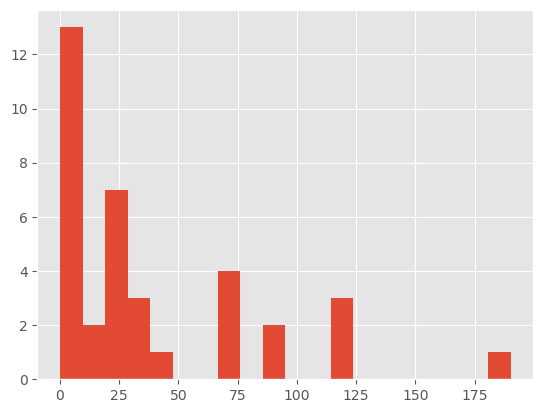

In [45]:
plt.hist(killer1, bins=20);

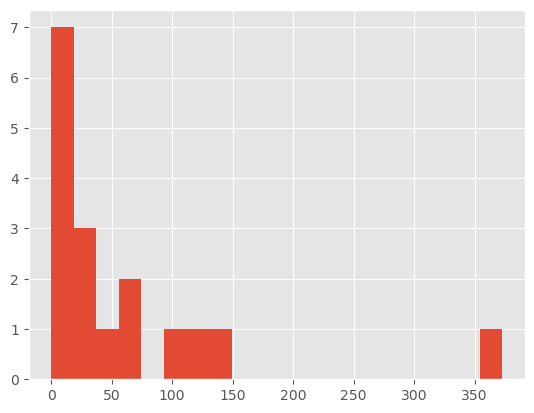

In [46]:
plt.hist(killer2, bins=20);

Распределение выглядит, как экспоненциальное. Более того, по гистограммам возникает ощущение, что это одинаковое распределение. С помощью теста Колмогорова-Смирнова проверьте гипотезу о том, что обе выборки пришли из одного и того же распределения, $p$-значение, полученное при проверке запишите в переменную `pvalue1`.

In [47]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

pvalue1 = stats.ks_2samp(killer1, killer2).pvalue

print(f'p-value 1: {pvalue1}')

p-value 1: 0.5452509816793373


<font color=blue>
    
$\text{p-value} > 0.5$, т.е. при любом разумном уровне значимости $\alpha$ можно принять нулевую гипотезу о том, что выборки пришли из одного распределения.  
    
</font>

С помощью теста Колмогорова проверьте гипотезу о том, что время для первой игры имеет экспоненциальное распределение с параметром $\lambda = 0.026$, $p$-значение, полученное при проверке запишите в переменную `pvalue2`.

In [48]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
l = 0.026
pvalue2 = stats.kstest(killer1, "expon", args=(0, 1/l)).pvalue

print(f'p-value 2: {pvalue2}')

p-value 2: 0.057352105478026605


<font color=blue>
    
$\text{p-value} \approx 0.0573 > 0.05$ , т.е. при уровне значимости $\alpha=5\%$ нулевая гипотеза о том, что время для первой игры имеет экспоненциальное распределение с параметром $\lambda = 0.026$ принимается.    
    
</font>    

In [49]:
# проверка того, что задание решено верно
assert pvalue1 > 0.5


## Мыши и зеркало

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом.

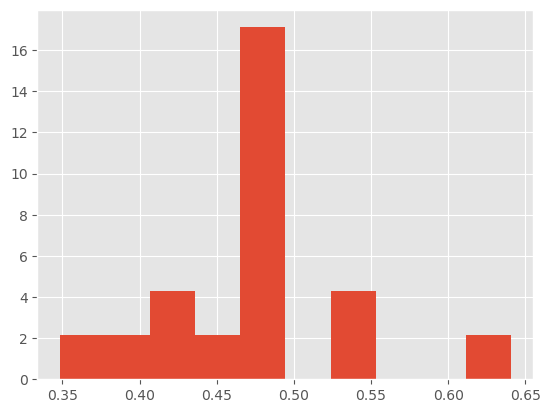

In [50]:
x = pd.read_csv(ROOT+'mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

<font color=blue>
    
по гистограмме можно заметить, что мыши больше предпочитали проводить время в отделении без зеркала.    
    
</font>    

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение.

<font color=blue>
    
С помощью критерия знаков проверим нулевую гипотезу, о том,что медианное значение доли времени (пусть это сл. величина $X$), которое мышь проводит в комнате с зеркалом равна $0.5$, т.е. $H_0: Med(X) = 0.5$ против двусторонней альтернативы $H_a: Med(X) \neq 0.5$. Особенность этого критерия в том, что им сложно отвергнуть нулевую гипотезу. Кроме того он не чувствителен к величине колебаниий значений в выборке - важна только позиция в вариационном ряду. Также  критерий знаков не использует никаких данных о характере распределения, что позволяет его применять в широком спектре ситуаций.
    
</font>    

In [51]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
from statsmodels.stats.descriptivestats import sign_test
med_0 = 0.5
T, pvalue_1 = sign_test(x, mu0=med_0)

print(f'pvalue 1: {pvalue_1:.4f}; T: {T}')

pvalue 1: 0.0213; T: -5.0


<font color=blue>
    
$\text{p-value}=0.0213$, т.е. нулевую гипотезу можно принять на уровне $\alpha=0.02$, но на уровне $\alpha=0.05$ уже можно отвергнуть.    
    
</font>

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение.

<font color=blue>
    
Проверим нулевую гипотезу $H_0: Med(X)=0.5$ против гипотезы $H_a: Med(X)\neq0.5$ с помощью теста Вилкоксона. 

- Тест Вилкоксона не делает предположений о распределении данных, что делает его подходящим для данных, которые не следуют нормальному распределению-
- Суть метода состоит в сопоставлении абсолютных величин выраженности сдвигов в том или ином направлении.
- Все абсолютные величины сдвигов ранжируются, а затем суммируются ранги.
- Тест Вилкоксона применим в тех случаях, когда признаки измерены, по крайней мере, в порядковой шкале.
- Эффективнее применять критерий, если разброс значений достаточно широк, например от -30 до 30.
    
</font>

In [52]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
w, pvalue_2 = stats.wilcoxon(x-med_0)

print(f'p-value 2: {pvalue_2:.4f}, w: {w}')

p-value 2: 0.0934, w: 35.0


<font color=blue>
    
$\text{p-value} \approx 0.0934 > 0.05$, т.е. на уровне значимости $\alpha = 0.05$ нулевая гипотеза принимается.    
    
</font>    

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение.

<font color=blue>
Проверим нулевую гипотезу, предполагая, что среднее значение $\bar{X}$ ассимптотически нормальная сл. величина, т.е.  гипотезу $H_0: \bar{X}=0.5$, против гипотезы $H_a: \bar{X}\neq 0.5$ рассмотрев статистику $z_{obs} = \frac{0.5 - \bar{X}}{\sqrt{\frac{\hat{\sigma}^2}{n}}}\sim N(0,1)$ (ассимптотически)


</font>

In [53]:
from statsmodels.stats.weightstats import ztest,zconfint

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
z_obs = (0.5 - x.mean())/np.sqrt(x.var(ddof=1)/x.size)
pvalue_3 = 2 * (1 - stats.norm().cdf(z_obs))

print(f'p-value 3: {pvalue_3:.4f}; z_obs: {z_obs:.4f}')

p-value 3: 0.1346; z_obs: 1.4962


<font color=blue>

В этом критерии p-value стал еще больше $\approx 0.1346$, т.е. нулевая гипотеза может приниматься с еще большей уверенностью (например при уровне значимости $\alpha=0.1$).

</font>

In [54]:
# проверка того, что задание решено верно
assert pvalue_1 < 0.05
assert pvalue_2 > 0.05
assert pvalue_3 > 0.05


Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

<font color=blue>
    
Чем больше информации о выборке использует критерий, тем больше и больше становится значение p-value, т.е. уверенность, с которой принимается нулевая гипотеза. Меньше всего информации использует критерий знаков - он учитывает только направление сдвига. Критерий Вилкоксона кроме направления сдвига учитывает абсолютную величину сдвига. А ассимптотический z-тест учитывает самое содержательное знание о данных - ассимптотический закон распределения среднего значения.     
    
</font>

## Энергетик

Исследовательница Глафира считает, что любовь к энергетическим напиткам и успешность сдачи экзамена по математической статистике должны быть как-то связаны. Опросив $200$ своих однокурсников, она получила следующие результаты:

- Сдал, пьёт энергетик: 20
- Сдал, не пьёт энергетик: 120
- Завалил, пьёт энергетик: 40
- Завалил, не пьёт энергетик: 20

Правда ли, что энергетик оказывает на успешность сдачи экзамена какое-то влияние? Проверьте гипотезу с помощью критерия Пирсона. В качестве ответа запишите в переменную `pvalue` получившееся $p$-значение.

<font color=blue>
    
Проверим нулевую гипотезу о равенстве долей сдавших экзамен студентов $p_x = p_y$ в двух выборках (пивших и не пивших энергетик)  $H_0: p_x = p_y$ против альтернативы $H_a: p_x\neq p_y$. Для этого для таблицы сопряженности 2x2 найдем статистику $\sum_{j=1}^s \frac{\left(O_{j}-E_{j}\right)^{2}}{E_{j}}\sim \chi^2_{(m - 1)(k - 1)}$ где $O_j$ - наблюдаемая частота (число событий) в j-ой ячейке таблицы, а $E_j$ - ожидаемая частота (тоже число событий) в j-ой ячейчке таблицы. В данном случае $s = 4\, k=2\,m=2$ (s  -  число ячеек, k - число строк, m - число столбцов)
    
Если:
- 1-я ячейка - это те кто пьет и сдал
- 2-я ячейка - это те кто пьет и не сдал
- 3-я ячейка - это те кто не пьет и сдал
- 4-я ячейка  - это те кто не пьет и не сдал

Тогда:
- $O_1 = 20\,E_1 = \frac{(20+120)\cdot(20+40)}{200}=42$
- $O_2 = 40\,E_2 = \frac{(40+20)\cdot(20+40)}{200}=18$
- $O_3 = 120\,E_3 = \frac{(120+20)\cdot(120+20)}{200}=98$
- $O_4 = 20\,E_4 = \frac{(20+40)\cdot(120+20)}{200}=42$
    
И тогда $\chi^2_{obs} \left(= \frac{(20-42)^2}{42} + \frac{(40-18)^2}{18} + \frac{(120-98)^2}{98} + \frac{(20-42)^2}{42}\right)\sim\chi^2_{1}$.
    
    
</font>    

In [55]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
alpha = 0.05
obs = np.array([20, 40, 120, 20])
ex = np.array([42, 18, 98, 42])
chi2_obs = np.sum((obs - ex) ** 2 / ex)
chi2_crit = stats.chi2(df=1).ppf(1 - alpha)
pvalue = 1 - stats.chi2(df=1).cdf(chi2_obs)
print(f'chi2_obs: {chi2_obs:.4f}; chi2_crit: {chi2_crit:.4f}; p-value: {pvalue}')


chi2_obs: 54.8753; chi2_crit: 3.8415; p-value: 1.284528039491306e-13


<font color=blue>
    
Вычислим для самопроверкии статистику и p-value с помощью встроенной в `scipy.stats` функции `chi2_contingency`. 
    
</font>    

In [56]:
table = [[20, 120], [40, 20]]
chi2, pvalue2, _, _ = stats.chi2_contingency(table, correction=False)
print(f'chi2: {chi2:.4f}; p-value: {pvalue2}')

chi2: 54.8753; p-value: 1.2842596566074162e-13


<font color=blue>
    
Вычисления совпали!
    
</font>

<font color=blue>
    
Таким образом p-value $\approx 0$, т.е. нулевая гипотеза уверенно отвергается.
    
</font>

In [57]:
# проверка того, что задание решено верно
assert pvalue < 0.05


## Бомбардировки

В таблице `london_07-09-1940.tsv` лежат данные о бомбардировке Лондона 7 сентября 1940 года немецкой авиацией. Интересно выяснить, насколько прицельно велась бомбардировка. Если немецкие войска знали, где именно находятся британские военные объекты, они вели бы бомбардировку пристрельно.  

Ещё больше данных о бомбардировке Лондона ищите здесь: http://bombsight.org/data/sources/

In [58]:
df = pd.read_csv(ROOT+'london_07-09-1940.tsv', sep='\t')
print(df.shape)
df.head()

(751, 6)


,Time,Location,Type_of_bomb,Damage,x,y
0,0:08,"43 Southwark Park Road, SE16, London, UK",IB,Grocers: 3x2 roof damaged,-0.127660,51.507351
1,0:10,"49 Southwark Park road, Bermondsey, SE16, Lond...",IB,Bakers: 3x2 roof damaged,-0.054303,51.487794
2,0:15,"84 Southwark Park Road, SE16, London, UK",IB,front room on 1st floor and contents slightly ...,-0.127660,51.507351
3,0:18,"141 Braidwood Road, Catford SE6, London, UK",IB,10x6 roof damage,-0.025584,51.443299
4,0:20,"129 Killearn Road, Catford SE6, London, UK",IB,Front room on 1st floor severely damaged,-0.025584,51.443299


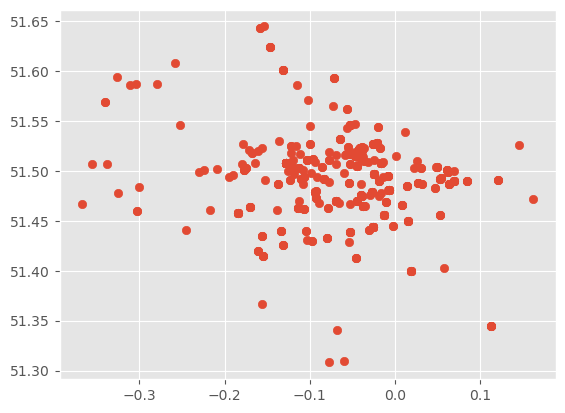

In [59]:
plt.scatter(df.x, df.y);

В колонках $x$ и $y$ лежат координаты точки, куда упала бомба. Разбейте Лондон решёткой размера $30 \times 30$ на $900$ небольших квадратных участков. С помощью функции `binned_statistic_2d` из пакета `scipy.stats`, подсчитайте как часто снаряд попадал на какой из участков. Поместите информацию об этом в переменную `ret`.

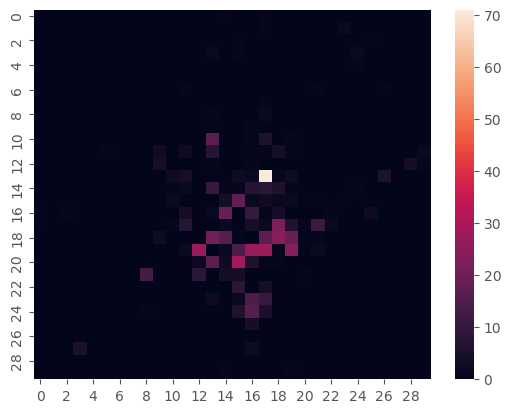

In [60]:
binx = np.linspace(df.x.min(), df.x.max(), 31)
biny = np.linspace(df.y.min(), df.y.max(), 31)

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

ret = stats.binned_statistic_2d(df.x, df.y, None, 'count', bins=[binx, biny])
sns.heatmap(ret.statistic);

Распакуйте информацию о попаданиях в участки в вектор `z`. Нарисуте гистограмму для получившегося распределения.

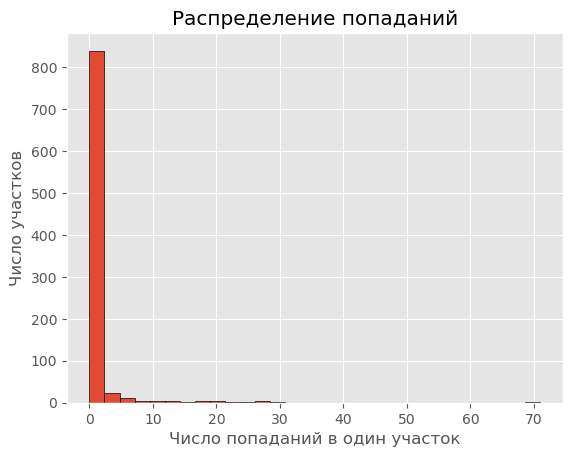

In [61]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below


# Распаковка информации о попаданиях в участки в вектор z
z = ret.statistic.flatten()

# Построение гистограммы
plt.hist(z, bins=30, edgecolor='black')
plt.title('Распределение попаданий')
plt.xlabel('Число попаданий в один участок')
plt.ylabel('Число участков')
plt.show()

Участков много, а вероятность попадания на отдельный участок мала. При справедливости гипотезы о низкой точности стрельбы мы можем воспользоваться законом редких событий:

> Если в схеме испытаний Бернулли $p \to 0$, а $n \to \infty$, оно сходится к распределению Пуассона.

Получается, что __при верности гипотезы о низкой точности стрельбы,__ число попаданий в квадрат имеет распределение Пуассона. Дополнительно будем предполагать, что попадания на разные участки независимы друг от друга.

C помощью критерия Пирсона проверьте гипотезу о том, что число попаданий на участок имеет распределение Пуассона. Прежде, чем вычислять статистику, объедините все наблюдения из хвоста в одно по аналогии с лекцией. Хвостом будем считать все наблюдения $\ge 9$. Получившуюся в результате расчётов статистику запишите в переменную `T`.

<font color=blue>
    
Проверим нулевую гипотезу о том, что распределение числа попаданий в один участок (сл. в. $Z$) имеет распределение Пуассона с параметром $\lambda$, который оценим как среднее по числу участков = 900 наблюдаемых попаданий `z.mean()`. $H_0: Z\sim Poisson(\lambda)$. Для этого используем критерий $\chi^2$ Пирсона: $\chi^2_{obs}=\sum_{j=1}^{10} \frac{(v_j - n \cdot p_j(\hat \theta))^2}{n \cdot p_j(\hat \theta)} \sim \chi^2_{10-1-1}=\chi^2_{8}$   
    
</font>

In [62]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below
from scipy.stats import poisson


# вектор наблюдаемых частот (кол-во участков с ровно k попаданиями k=0,1,2...9) 
# длины 10 (от 0 до 9); все наблюдения z >= 9 объединены в одно: obs[9] k=9
obs = np.array([len(z[z==i]) for i in range(9)] + [len(z[z >=9])])

s = len(obs)
n = sum(obs)

# Оценка параметра lambda
lam = z.mean()

# Вектор ожидаемых частот (ожидаемое количество участков с ровно 
# k попаданиями k=0,1,2,...,9 при условии, что всего участков n=len(z)=sum(obs)=900)
expected = poisson.pmf(range(10), lam) * n

# хи квадрат статистика и p-value
T = chi2_obs = np.sum((obs - expected)**2/expected)
p_value = 1 - stats.chi2(df=s-2).cdf(chi2_obs)

print(f'T = chi2_obs: {chi2_obs}; p_value: {p_value}')


T = chi2_obs: 2732645.6089991415; p_value: 0.0


In [63]:
# проверка того, что задание решено верно
assert T > 6000


Какой вывод мы можем из этого сделать? Правда ли, что бомбардировка осуществлялась прицельно?

<font color=blue>
    
p-value = 0, т.е. нулевую гипотезу можно уверенно отвергнуть. Бомбардировка носила прицельный, а не случайный характер.    
    
</font>    

# Еще больше гипотез

- Ниже приведены несколько датасетов, их необходимо самостоятельно проанализировать и ответить на определенные вопросы
- Для ответа на эти вопросы нужно сделать следующее
    - Сделать хорошую визуализацию исследуемых переменных
    - Для каждой из задач подобрать **все подходящие** параметрические и непараметрические критерии, проанализировать результаты этих критериев (тут имеет смысл обернуть все критерии в фунцию или словарь - как удобно)
- Для каждого набора данных проверьте нормальность выборки и допустимость использования параметрических критериев (можно прокомментировать гистограмму и воспользоваться соответствующими критериями согласия)
- Не забудьте оставить краткие комментарии к вашим действиям и сформулировать выводы, которые вы сделали в ходе анализа


## Сиэтл
В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились ли в среднем цены в этом районе за год?


In [64]:
df = pd.read_csv(ROOT+'seattle.txt', sep='\t')
df.head()


,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


<font color=blue>
    
Поместим цены за 2001 и 2002 годы в вектора `X` и `Y`    
    
</font>

In [65]:
X = df[df.Year == 2001].Price.to_numpy()
Y = df[df.Year == 2002].Price.to_numpy()

In [66]:
X.mean(), Y.mean()

(288.92654000000005, 329.25714)

<font color=blue>

Выборочные среднее в Y выборке чуть больше чем в X.

</font>    

In [67]:
d = Y - X
d[d > 0].size/d.size

0.52

<font color=blue>

Доля случаев, когда цена выросла через год чуть больше половины - 0.52.
    
</font>

In [68]:
print(np.median(Y - X))

26.974999999999994


<font color=blue>

Выборочная медиана разницы `Y-X` ожидаемо оказалась > 0

</font>

<font color=blue>
    
Проверим выборку `X` на нормальность с помощью теста Колмогорова-Смирнова.
    
</font>

In [69]:
X.size

50

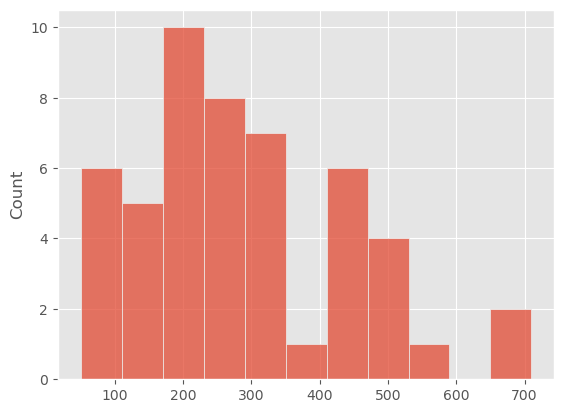

In [70]:
sns.histplot(X, bins=11);

In [71]:
mu = X.mean()
sigma = X.std(ddof=1)
stats.kstest(X, 'norm', args=(mu, sigma))

KstestResult(statistic=0.10199767623856881, pvalue=0.6383920354669088, statistic_location=239.9, statistic_sign=1)

<font color=blue>
    
p-value очень высокий, т.е. нулевую гипотезу о нормальности `X` можно уверенно принять.

Посмотрим на графике как эмпирическая функция распределения отличается от теоретической.    
    
</font>

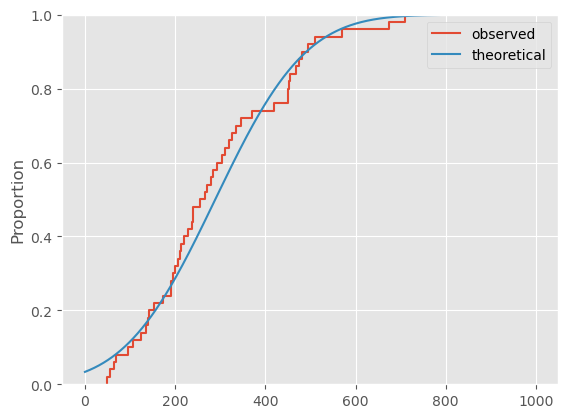

In [72]:
sns.ecdfplot(X, label='observed');

xs = np.arange(0, 1000, 0.1)
cdf = stats.norm.cdf(xs, loc=mu, scale=sigma)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

<font color=blue>
    
Проверим выборку `Y` на нормальность с помощью теста Колмогорова-Смирнова.
    
</font>

In [73]:
Y.size

50

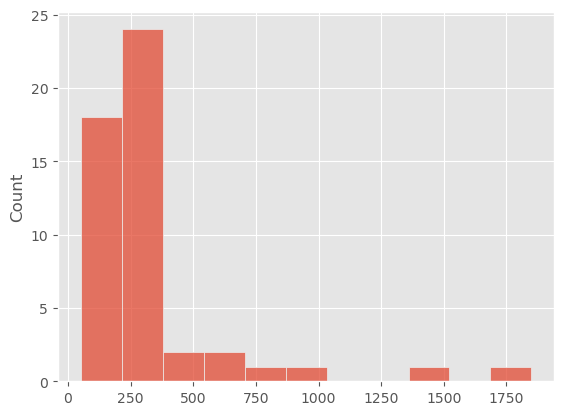

In [74]:
sns.histplot(Y, bins=11);

In [75]:
mu = Y.mean()
sigma = Y.std(ddof=1)
stats.kstest(Y, 'norm', args=(mu, sigma))

KstestResult(statistic=0.2927691699402488, pvalue=0.000272082474651694, statistic_location=335.0, statistic_sign=1)

<font color=blue>
    
p-value весьма низкий, т.е. нулевую гипотезу о нормальности `Y` можно уверенно отвергнуть.

Посмотрим на графике как эмпирическая функция распределения отличается от теоретической.    
    
</font>

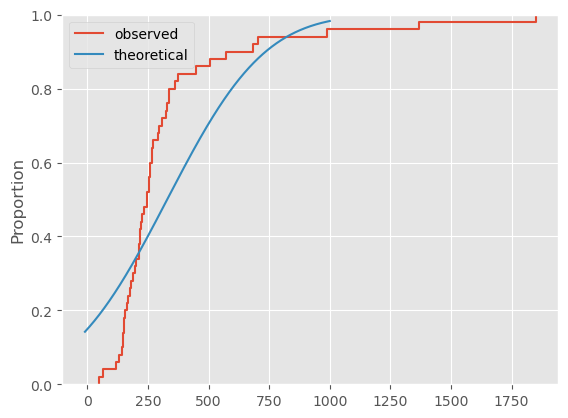

In [76]:
sns.ecdfplot(Y, label='observed');

xs = np.arange(-10, 1000, 0.1)
cdf = stats.norm.cdf(xs, loc=mu, scale=sigma)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

<font color=blue>
    
Проверим теперь разницу выборок `D = Y - X` на нормальность с помощью теста Колмогорова-Смирнова.
    
</font>

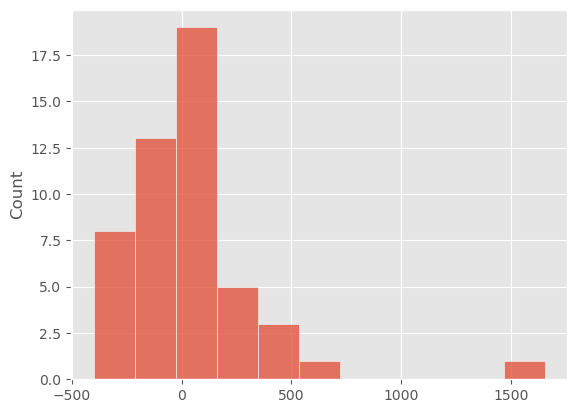

In [77]:
D = Y - X
sns.histplot(D, bins=11);

In [78]:
mu = D.mean()
sigma = D.std(ddof=1)
stats.kstest(D, 'norm', args=(mu, sigma))

KstestResult(statistic=0.1861049639918254, pvalue=0.05464070848774927, statistic_location=182.28, statistic_sign=1)

<font color=blue>
    
p-value > 0.05, т.е. нулевую гипотезу о нормальности `D` можно принять на уровне значимости $\alpha=0.05$.

Посмотрим на графике как эмпирическая функция распределения отличается от теоретической.    
    
</font>

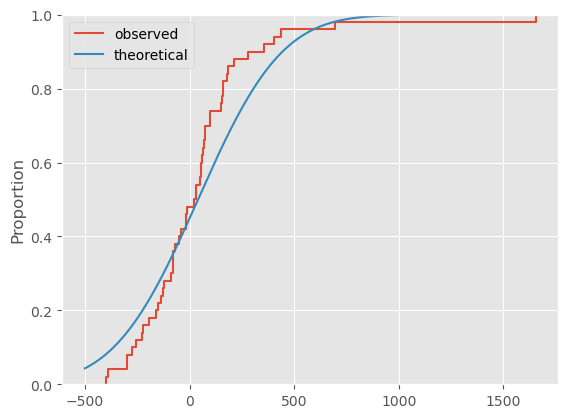

In [79]:
sns.ecdfplot(D, label='observed');

xs = np.arange(-500, 1000, 0.1)
cdf = stats.norm.cdf(xs, loc=mu, scale=sigma)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

<font color=blue>
    
Итак мы принимаем, что `D` распределена нормально, проверим нулевую гипотезу, что среднее значение в выборке `D` равно 0: $H_0: \mu=0$, против двусторонней альтернативы, что $H_a: \mu \neq 0$.

Для нормальной выборки можно использовать точный t-критерий: $z_{obs}=\sqrt{n}\cdot\frac{\bar{D}-0}{\hat{\sigma}}\underset{H_0}\sim t(n-1)$. 
</font>    

In [80]:
n = D.size
alpha = 0.05
z_obs = np.sqrt(n) * D.mean()/D.std(ddof=1)
z_crit = stats.t(n - 1).ppf(1 - alpha/2)
p_value = 2 * (1 - stats.t(n-1).cdf(np.abs(z_obs)))

print(f'z_obs: {z_obs:.4f}; z_crit: {z_crit:.4f}; p_value: {p_value:.4f}')

z_obs: 0.9055; z_crit: 2.0096; p_value: 0.3697


<font color=blue>
    
p-value очень высокий, т.е. нулевая гипотеза о равенстве среднего значения нулю принимается. Таким образом можно сделать вывод, что цены не изменились.     
    
</font>

<font color=blue>
    
Другой подход    
    
</font>    

<font color=blue>
    
Имеем 2 связанные выборки, т.е. есть смысл применить двухвыборочный критерий знаков и проверить нулевую гипотезу:

$H_0\colon P(Y > X) = P(Y - X > 0) = 0.5$

$H_a\colon P(Y > X) \ne 0.5$    
    
</font>    

In [81]:
T, pvalue = sign_test(Y-X) # sign_test(x, y)
print(T, pvalue)

1.0 0.887724827340783


<font color=blue>
    
p-value очень высокий $\Rightarrow$ нулевая гипотеза принимается и вывод подверждается: цены не изменились.    
    
</font>    

<font color=blue>
    
Также для связанных выборок можем применить критерий Уилкоксона (ранговый):
    
$H_0\colon Med(X - Y) = 0$

$H_a\colon Med(X - Y) \ne 0$
    
</font>    

In [82]:
print(f'p-value: {stats.wilcoxon(X, Y)[1]:.4f}')

p-value: 0.8109


<font color=blue>
    
p-value снова очень высокий $\Rightarrow$ нулевая гипотеза принимается и вывод снова подверждается: цены не изменились.    
    
</font>   

## Расход топлива
В файле mtcars.csv находятся данные из американского журнала Motor Trend 1974 года. Они описывают расход топлива в зависимости от 10 характеристик автомобиля (все автомобили 1973-1974 года). А именно, в данных вы найдете следующие столбцы:
1. mpg — расход топлива (миль/галлон);
2. cyl — количество цилиндров мотора; 3) disp — объем мотор (куб. дюйм);
4. hp — мощность мотора (в лошадиных силах);
5. drat — передаточное число редуктора заднего моста;
6. wt — вес (тысяч фунтов);
7. qsec — время, за которое автомобиль проезжает 1/4 мили;
8. vs — тип двигателя (0 = V-образный, 1 = рядный);
9. am — тип коробки передач (0 = автоматическая, 1 = ручная);
10. gear — количество передних передач; 11) carb — количество карбюраторов.



- Влияет ли тип двигателя на расход топлива?
- А тип коробки передач?
- Взаимосвязаны ли тип двигателя и тип коробки передач?

In [83]:
df = pd.read_csv(ROOT+'mtcars.csv', index_col=0)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### vs, mpg

<font color=blue>
    
Поместим в `X` выборку значений расхода топлива для V-образных двигателей, а в `Y` для рядных.    
    
</font>    

In [84]:
X = df[df.vs == 0].mpg.to_numpy()
Y = df[df.vs == 1].mpg.to_numpy()
X, Y

(array([21. , 21. , 18.7, 14.3, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 15.5,
        15.2, 13.3, 19.2, 26. , 15.8, 19.7, 15. ]),
 array([22.8, 21.4, 18.1, 24.4, 22.8, 19.2, 17.8, 32.4, 30.4, 33.9, 21.5,
        27.3, 30.4, 21.4]))

In [85]:
X.size, Y.size

(18, 14)

Проверим выборки на нормальность с помощью теста Колмогорова-Смирнова

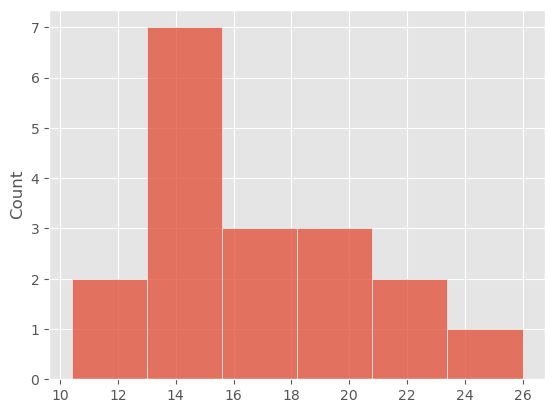

In [86]:
sns.histplot(X);

In [87]:
mu = X.mean()
sigma = X.std(ddof=1)
stats.kstest(X, 'norm', args=(mu, sigma))

KstestResult(statistic=0.13931999837455317, pvalue=0.8295486124727139, statistic_location=15.8, statistic_sign=1)

Для X выборки p-value очень высокий $\Rightarrow$ нулевая гипотеза о нормальности X выборки принимается

In [88]:
X.min(), X.max()

(10.4, 26.0)

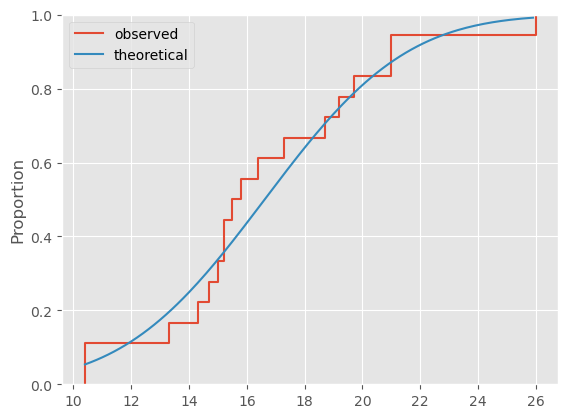

In [89]:
sns.ecdfplot(X, label='observed');

xs = np.arange(X.min(), X.max(), 0.1)
cdf = stats.norm.cdf(xs, loc=mu, scale=sigma)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

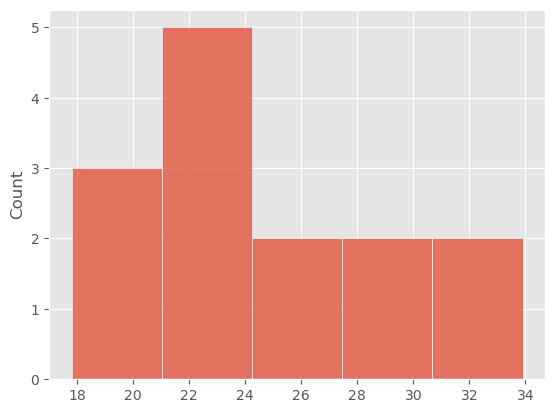

In [90]:
sns.histplot(Y);

In [91]:
mu = Y.mean()
sigma = Y.std(ddof=1)
stats.kstest(Y, 'norm', args=(mu, sigma))

KstestResult(statistic=0.1994692655963234, pvalue=0.5663604606362261, statistic_location=22.8, statistic_sign=1)

Для Y выборки p-value тоже очень высокий $\Rightarrow$ нулевая гипотеза о нормальности Y тоже принимается.

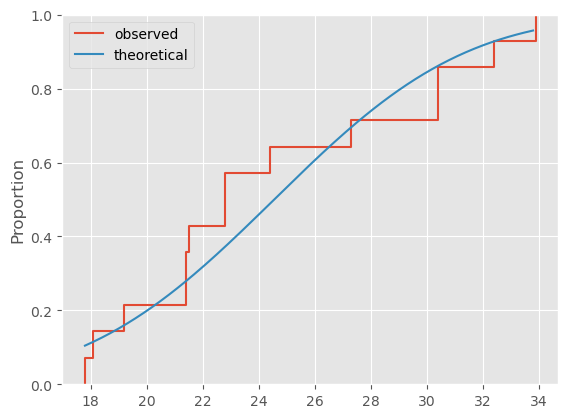

In [92]:
sns.ecdfplot(Y, label='observed');

xs = np.arange(Y.min(), Y.max(), 0.1)
cdf = stats.norm.cdf(xs, loc=mu, scale=sigma)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

In [93]:
X.var(ddof=1), Y.var(ddof=1)

(14.904999999999998, 28.933406593406588)

Итак имеем нормально распределенные выборки. Считаем, что они независимые. 

Проверим сначала нулевую гипотезу о равенстве дисперисий в этих выборках против односторонней альтернативы.

$$
\begin{aligned}
&H_0: \hspace{2mm} \sigma^2_x = \sigma^2_y \hspace{2mm}\\
&H_a: \hspace{2mm} \sigma^2_x < \sigma^2_y  \hspace{2mm}
\end{aligned}
$$

Распределения нормальные, можем использовать F-статистику.

$$
F = \frac{\hat{\sigma}_{y}^{2}}{\hat{\sigma}_{x}^{2}}\sim F\left(n_{y}-1,\ n_{x}-1\right)
$$

In [94]:
F_obs = Y.var(ddof=1)/X.var(ddof=1)
print(f'F_obs: {F_obs:.4f}; p-value: {(1 - stats.f(Y.size - 1, X.size - 1).cdf(F_obs)):.4f}')

F_obs: 1.9412; p-value: 0.0999


In [95]:
X.mean(), Y.mean()

(16.616666666666667, 24.557142857142857)

p-value > 0.05, т.е. нулевую гипотезу можно принять на уровне значимости 0.05 и далее считаем, что дисперсии равны. Раз дисперсии равны, то можем посчитать тест Стьюдента для проверки нулевой гипотезы о равенстве средних против односторонней альтернативы, что среднее Y выборки больше среднего X выборки:

$$
t=\dfrac{\bar{x}-\bar{y} }{\sqrt{\dfrac{\hat{\sigma}^{2}}{n_x}+\dfrac{\hat{\sigma}^{2}}{n_y}}} \sim t(n_x+n_y-2)
$$

где $\hat{\sigma}^{2}$ - объединенная дисперсия:
$$
\hat{\sigma}^{2}=\frac{\left(n_{x}-1\right) \hat{\sigma}_{x}^{2}+\left(n_{y}-1\right) \hat{\sigma}_{y}^{2}}{n_{x}+n_{y}-2}
$$

In [96]:
n_x = X.size
n_y = Y.size

var = ((n_x-1)*X.var(ddof=1) + (n_y-1)*Y.var(ddof=1))/(n_x+n_y-2)
t_obs = (Y.mean() - X.mean())/np.sqrt(var/n_x + var/n_y)
print(f't_obs: {t_obs:.4f}; p-value: {1 - stats.t(n_x + n_y - 2).cdf(t_obs):.4f}')

t_obs: 4.8644; p-value: 0.0000


p-value $\approx$ 0, т.е. нулевую гипотезу смело можно отвергнуть. Т.е. средний расход топлива рядных двигателей значимо выше чем у V-образных

### am, mpg

Проделаем такой же анализ для типа коробки передач. В `X` поместим значения для автоматической коробки, а в `Y` для ручной.

In [97]:
X = df[df.am == 0].mpg.to_numpy()
Y = df[df.am == 1].mpg.to_numpy()
X, Y

(array([21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2,
        10.4, 10.4, 14.7, 21.5, 15.5, 15.2, 13.3, 19.2]),
 array([21. , 21. , 22.8, 32.4, 30.4, 33.9, 27.3, 26. , 30.4, 15.8, 19.7,
        15. , 21.4]))

In [98]:
X.size, Y.size

(19, 13)

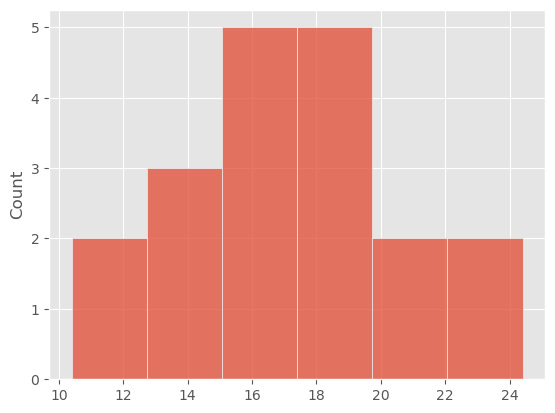

In [99]:
sns.histplot(X);

In [100]:
mu = X.mean()
sigma = X.std(ddof=1)
stats.kstest(X, 'norm', args=(mu, sigma))

KstestResult(statistic=0.0873374415918009, pvalue=0.9959214411306438, statistic_location=15.5, statistic_sign=1)

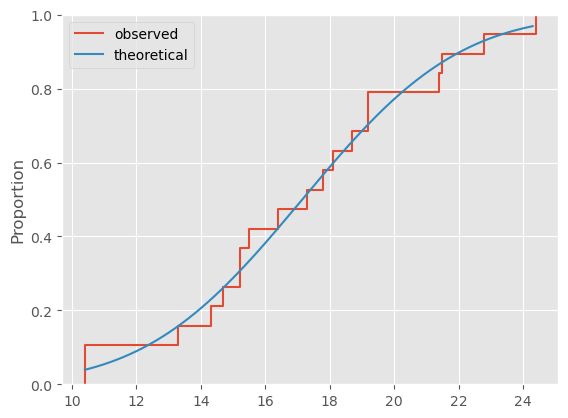

In [101]:
sns.ecdfplot(X, label='observed');

xs = np.arange(X.min(), X.max(), 0.1)
cdf = stats.norm.cdf(xs, loc=mu, scale=sigma)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

p-value очень высокий $\Rightarrow$ принимаем, что X нормальна

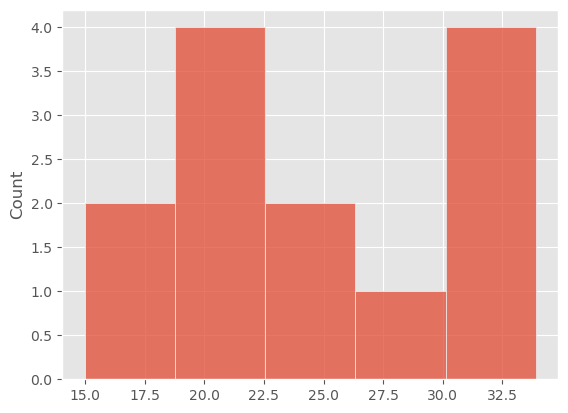

In [102]:
sns.histplot(Y);

In [103]:
mu = Y.mean()
sigma = Y.std(ddof=1)
stats.kstest(Y, 'norm', args=(mu, sigma))

KstestResult(statistic=0.14778962630894227, pvalue=0.8997844451669572, statistic_location=21.4, statistic_sign=1)

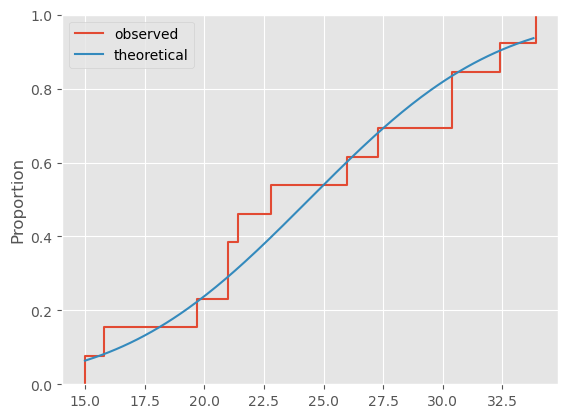

In [104]:
sns.ecdfplot(Y, label='observed');

xs = np.arange(Y.min(), Y.max(), 0.1)
cdf = stats.norm.cdf(xs, loc=mu, scale=sigma)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

Для Y p-value тоже очень высокий $\Rightarrow$ Принимаем что Y тоже нормальна.

Считаем, что X и Y независимы. Проверим, что дисперсии равны.

In [105]:
Y.var(ddof=1), X.var(ddof=1)

(38.02576923076922, 14.699298245614033)

In [106]:
F_obs = Y.var(ddof=1)/X.var(ddof=1)
print(f'F_obs: {F_obs:.4f}; p-value: {(1 - stats.f(Y.size - 1, X.size - 1).cdf(F_obs)):.4f}')

F_obs: 2.5869; p-value: 0.0335


In [107]:
X.mean(), Y.mean()

(17.147368421052633, 24.39230769230769)

p-value < 0.05 - нулевую гипотезу отвергаем, считаем далее, что дисперсии не равны и пользуемся тестом Уэлча:

$$
t=\dfrac{\bar{x}-\bar{y}}{\sqrt{\dfrac{\hat{s}_{x}^{2}}{n_x}+\dfrac{\hat{s}_{y}^{2}}{n_y}}} \sim t(v)
$$


где $v$ – примерное число степеней свободы:

$$
v=\frac{\left(\dfrac{\hat{s}_{x}^{2}}{n_{x}}+\dfrac{\hat{s}_{y}^{2}}{n_{y}}\right)^{2}}{\dfrac{\hat{s}_{x}^{4}}{n_{x}^{2}\left(n_{x}-1\right)}+\dfrac{\hat{s}_{y}^{4}}{n_{y}^{2}\left(n_{y}-1\right)}}
$$


In [108]:
var_x = X.var(ddof=1)
var_y = Y.var(ddof=1)
n_x = X.size
n_y = Y.size
nu = (var_x/n_x + var_y/n_y) ** 2 / (var_x ** 2/(n_x ** 2 * (n_x - 1)) + var_y ** 2 / ( n_y ** 2 * (n_y - 1)))
t_obs = (Y.mean() - X.mean())/np.sqrt(var_x/n_x+var_y/n_y)
p_value = 1 - stats.t(nu).cdf(t_obs)
print(f't_obs: {t_obs:.4f}; p-value: {p_value:.4f}')

t_obs: 3.7671; p-value: 0.0007


p-value очень маленький $\Rightarrow$ среднее Y значимо больше среднего X, т.е. в среднем расход топлива у машин с ручной коробкой значимо выше чем с автоматической.

### vs, am

Для определения взаимосвязи между двумя категориальными переменными, такими как тип двигателя и тип коробки передач, можно использовать хи-квадрат тест. Этот тест проверяет нулевую гипотезу о том, что две переменные независимы. Если p-value меньше выбранного уровня значимости (обычно 0.05), то мы отвергаем нулевую гипотезу и приходим к выводу, что переменные взаимосвязаны.

In [109]:
contingency_table = pd.crosstab(df['vs'], df['am'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"p-value: {p_value:.4f}")

p-value: 0.5555


p-value весьма велико $\Rightarrow$ нулевая гипотеза принимается, т.е. связи между коробкой передач и типом двигателя не наблюдается.